### Imports

Import dependencies and make a couple helper functions

In [1]:
%load_ext autoreload
%autoreload 2

import cv2
import numpy as np
import sys

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 12]

from wand import * #import the module here, so that it can be reloaded.

RESOLUTION = (1920,1440,3)

def captureImage(fname):
    img = cv2.imread(fname)
    if img.shape[:2] != RESOLUTION[:2]:
        img = cv2.resize(img,RESOLUTION[:2])
    return img

def drawImage(img):
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.show()

### Detection Masks

Introspect and edit detection masks and thresholds

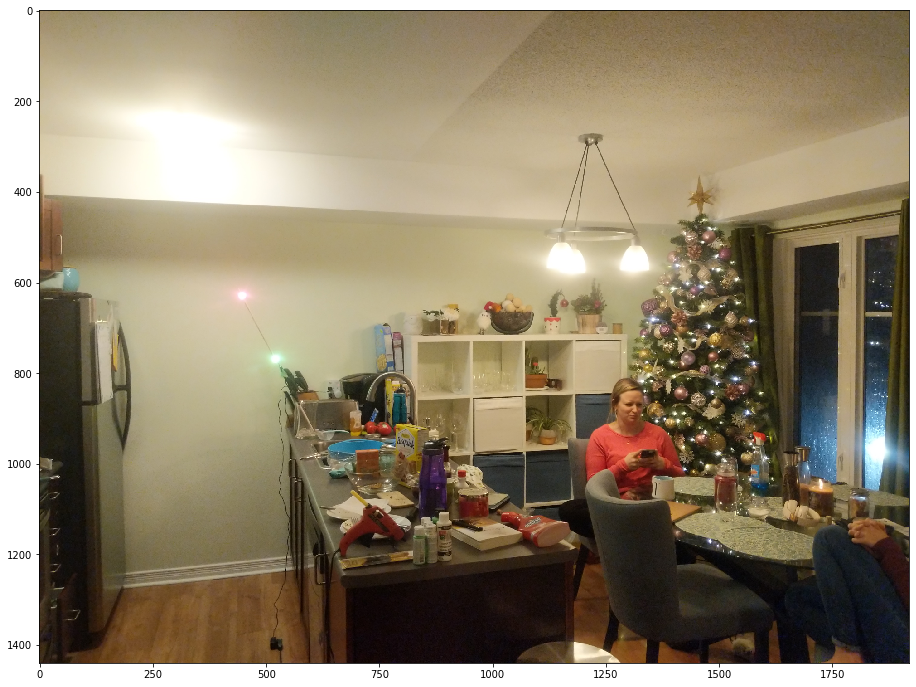

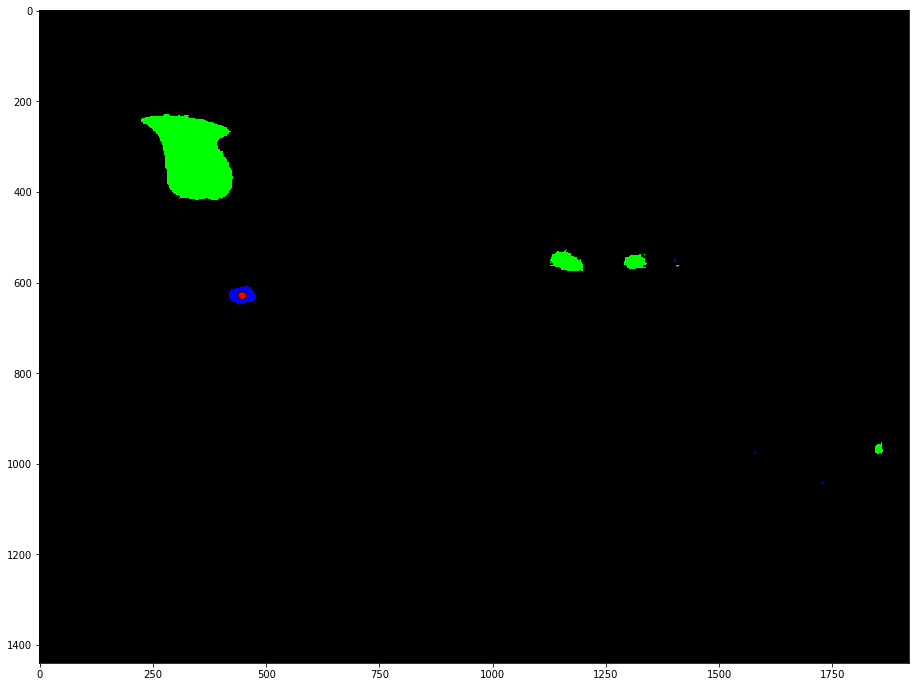

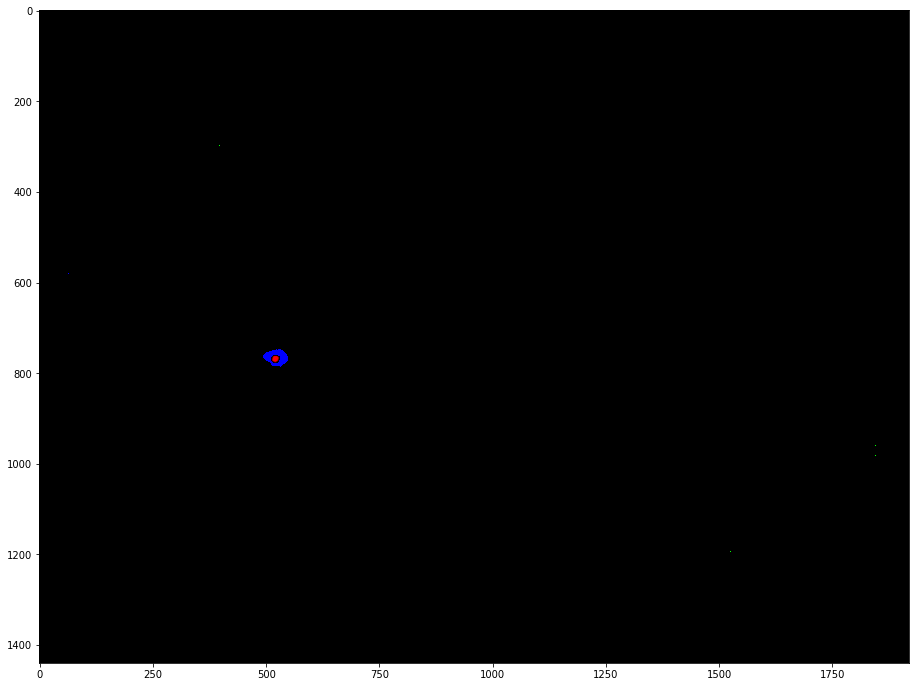

In [13]:
img = captureImage('test4.jpg')

topMarker = ActiveBallMarker(hue=345, hue_range=35,
    u_sat=0.2, m_sat=0.04, l_sat=0, u_bright=1, m_bright=0.96, l_bright=0.85)
bottomMarker = ActiveBallMarker(hue=120, hue_range=40,
    u_sat=0.2, m_sat=0.04, l_sat=0, u_bright=1, m_bright=0.96, l_bright=0.85)

top_mask = topMarker.getReadableMask(img)
bottom_mask = bottomMarker.getReadableMask(img)
drawImage(img)
drawImage(top_mask)
drawImage(bottom_mask)

### Verify

Test the final detector

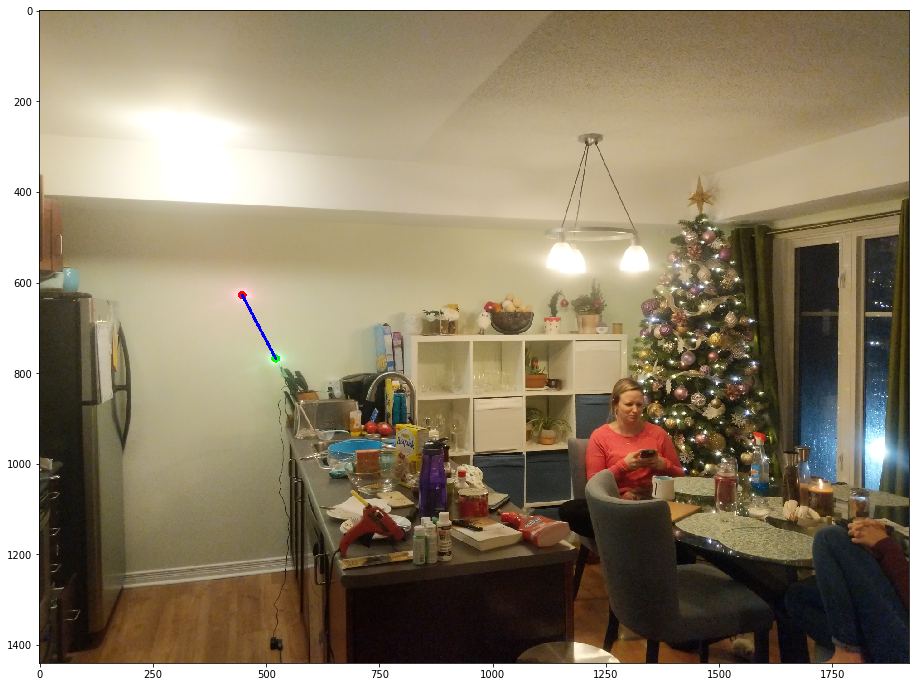

In [12]:
img = captureImage('test4.jpg')

wand = BallWand(0.4)
keypoints = wand.detect(img)
wand.draw(img,keypoints)

drawImage(img)